In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

In [3]:
data = pd.read_csv('../data/tianchi_mobile_recommend_train_user.csv')
data.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,98047837,232431562,1,NaN,4245,2014-12-06 02
1,97726136,383583590,1,NaN,5894,2014-12-09 20
2,98607707,64749712,1,NaN,2883,2014-12-18 11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10
4,98145908,290208520,1,NaN,13926,2014-12-16 21


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12256906 entries, 0 to 12256905
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        int64 
 1   item_id        int64 
 2   behavior_type  int64 
 3   user_geohash   object
 4   item_category  int64 
 5   time           object
dtypes: int64(4), object(2)
memory usage: 561.1+ MB


In [48]:
data.duplicated().sum()

4092866

In [50]:
data.drop_duplicates(inplace=True)

In [51]:
data.isnull().sum()

user_id                0
item_id                0
behavior_type          0
user_geohash     4308015
item_category          0
time                   0
dtype: int64

In [52]:
data.drop('user_geohash', axis=1, inplace=True)
data.head()

,user_id,item_id,behavior_type,item_category,time
0,98047837,232431562,1,4245,2014-12-06 02
1,97726136,383583590,1,5894,2014-12-09 20
2,98607707,64749712,1,2883,2014-12-18 11
3,98662432,320593836,1,6562,2014-12-06 10
4,98145908,290208520,1,13926,2014-12-16 21


In [53]:
data = data.reset_index(drop=True)

In [54]:
data['time'] = pd.to_datetime(data['time'])
data['date'] = data['time'].dt.date
data['hour'] = data['time'].dt.hour
data['date'] = pd.to_datetime(data['date'])
# data['hour'] = pd.to_datetime(data['hour'])
data.head()

,user_id,item_id,behavior_type,item_category,time,date,hour
0,98047837,232431562,1,4245,2014-12-06 02:00:00,2014-12-06,2
1,97726136,383583590,1,5894,2014-12-09 20:00:00,2014-12-09,20
2,98607707,64749712,1,2883,2014-12-18 11:00:00,2014-12-18,11
3,98662432,320593836,1,6562,2014-12-06 10:00:00,2014-12-06,10
4,98145908,290208520,1,13926,2014-12-16 21:00:00,2014-12-16,21


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8164040 entries, 0 to 8164039
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        int64         
 1   item_id        int64         
 2   behavior_type  int64         
 3   item_category  int64         
 4   time           datetime64[ns]
 5   date           datetime64[ns]
 6   hour           int32         
dtypes: datetime64[ns](2), int32(1), int64(4)
memory usage: 404.9 MB


In [57]:
data['user_id'] = data['user_id'].astype(str)
data['item_id'] = data['item_id'].astype(str)
data['item_category'] = data['item_category'].astype(str)

In [58]:
data.drop(labels='time', axis=1, inplace=True)

In [59]:
data.head()

,user_id,item_id,behavior_type,item_category,date,hour
0,98047837,232431562,1,4245,2014-12-06,2
1,97726136,383583590,1,5894,2014-12-09,20
2,98607707,64749712,1,2883,2014-12-18,11
3,98662432,320593836,1,6562,2014-12-06,10
4,98145908,290208520,1,13926,2014-12-16,21


In [22]:
# 日访问次数
pv_daily_s = data.groupby('date')['user_id'].count()
pv_daily_s.head()

date
2014-11-18    235493
2014-11-19    233144
2014-11-20    226523
2014-11-21    213894
2014-11-22    232994
Name: user_id, dtype: int64

In [23]:
# 日访问人数
uv_daily_s = data.groupby('date')['user_id'].nunique()
uv_daily_s.head()

date
2014-11-18    6343
2014-11-19    6420
2014-11-20    6333
2014-11-21    6276
2014-11-22    6187
Name: user_id, dtype: int64

In [24]:
# 人均访问次数
uv_pv_s = pv_daily_s / uv_daily_s
uv_pv_s.head()

date
2014-11-18    37.126439
2014-11-19    36.315265
2014-11-20    35.768672
2014-11-21    34.081262
2014-11-22    37.658639
Name: user_id, dtype: float64

In [25]:
df = pd.concat((pv_daily_s, uv_daily_s, uv_pv_s), axis=1)
df.columns = ['pv', 'uv', 'pv/uv']
df.head()

,pv,uv,pv/uv
date,,,
2014-11-18,235493,6343,37.126439
2014-11-19,233144,6420,36.315265
2014-11-20,226523,6333,35.768672
2014-11-21,213894,6276,34.081262
2014-11-22,232994,6187,37.658639


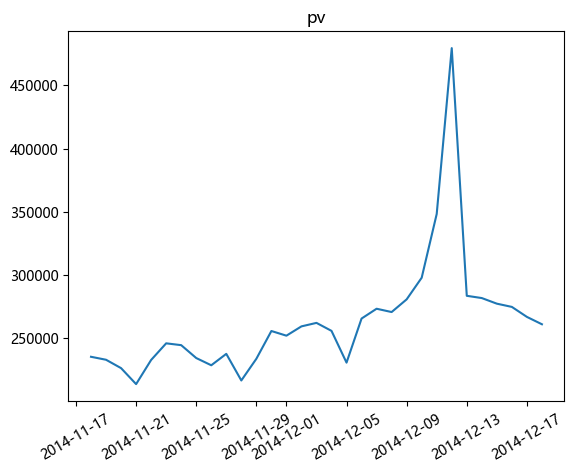

In [27]:
# pv折线图
plt.plot(df.index, df['pv'])
plt.title('pv')
plt.xticks(rotation=30)
plt.show()

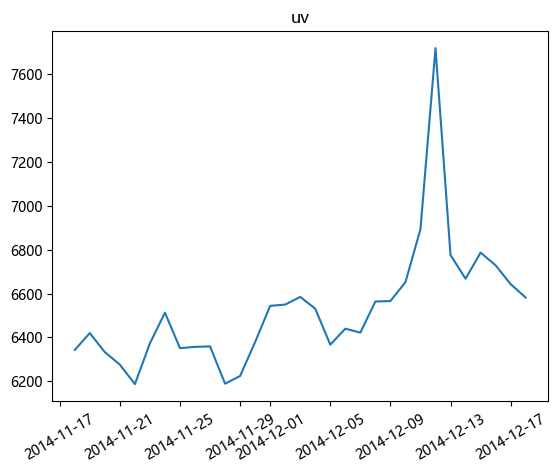

In [28]:
# uv折线图
plt.plot(df.index, df['uv'])
plt.title('uv')
plt.xticks(rotation=30)
plt.show()

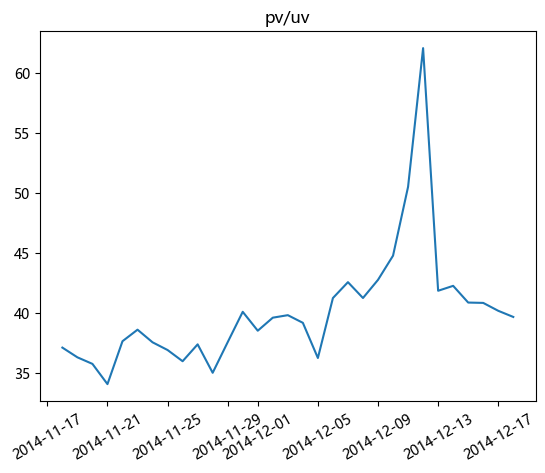

In [29]:
# pv/uv折线图
plt.plot(df.index, df['pv/uv'])
plt.title('pv/uv')
plt.xticks(rotation=30)
plt.show()

In [31]:
data_1212 = data[data['date']=='2014-12-12']
data_1212.head()

,user_id,item_id,behavior_type,item_category,date,hour
13,101260672,212072908,1,10984,2014-12-12,11
20,101781721,19349307,1,1863,2014-12-12,12
53,100684618,94486594,1,10984,2014-12-12,23
68,103802946,190848347,1,5232,2014-12-12,22
93,104811265,354843735,1,10585,2014-12-12,21


In [32]:
# 2014-12-12每小时pv, uv, pv/uv
pv_hour_s = data_1212.groupby('hour')['user_id'].count()
uv_hour_s = data_1212.groupby('hour')['user_id'].nunique()
pv_uv_hour_s = pv_hour_s / uv_hour_s

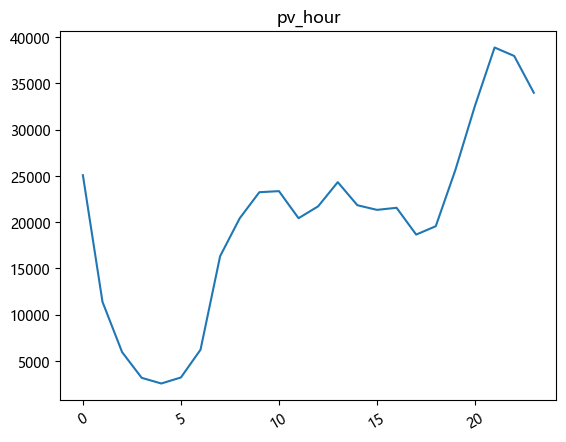

In [34]:
# 画出pv_hour的折线图
plt.plot(pv_hour_s.index, pv_hour_s.values)
plt.title('pv_hour')
plt.xticks(rotation=30)
plt.show()

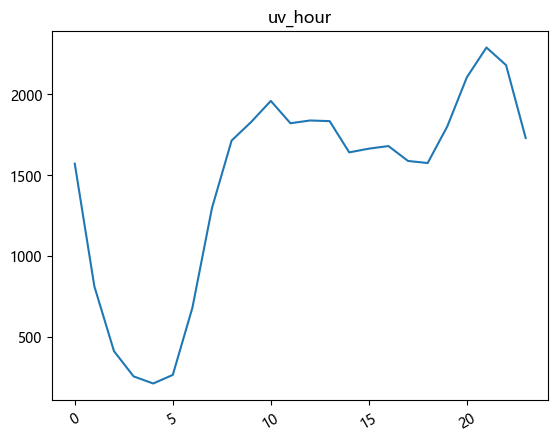

In [35]:
# 画出uv_hour的折线图
plt.plot(uv_hour_s.index, uv_hour_s.values)
plt.title('uv_hour')
plt.xticks(rotation=30)
plt.show()

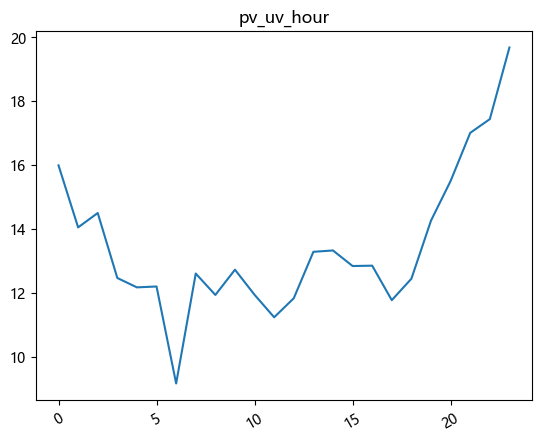

In [36]:
# 画出pv_uv_hour的折线图
plt.plot(pv_uv_hour_s.index, pv_uv_hour_s.values)
plt.title('pv_uv_hour')
plt.xticks(rotation=30)
plt.show()

In [37]:
data.pivot_table(index='date', aggfunc='count').head()

,behavior_type,hour,item_category,item_id,user_id
date,,,,,
2014-11-18,235493,235493,235493,235493,235493
2014-11-19,233144,233144,233144,233144,233144
2014-11-20,226523,226523,226523,226523,226523
2014-11-21,213894,213894,213894,213894,213894
2014-11-22,232994,232994,232994,232994,232994


In [38]:
data.pivot_table(index='date', aggfunc='size').head()

date
2014-11-18    235493
2014-11-19    233144
2014-11-20    226523
2014-11-21    213894
2014-11-22    232994
dtype: int64

In [60]:
pv_df = data.pivot_table(index='date', columns='behavior_type',  aggfunc='size', fill_value=0)
pv_df.head()

behavior_type,1,2,3,4
date,,,,
2014-11-18,215480,6797,9800,3416
2014-11-19,213108,7079,9607,3350
2014-11-20,206740,7063,9552,3168
2014-11-21,196121,6722,8328,2723
2014-11-22,213292,7001,9493,3208


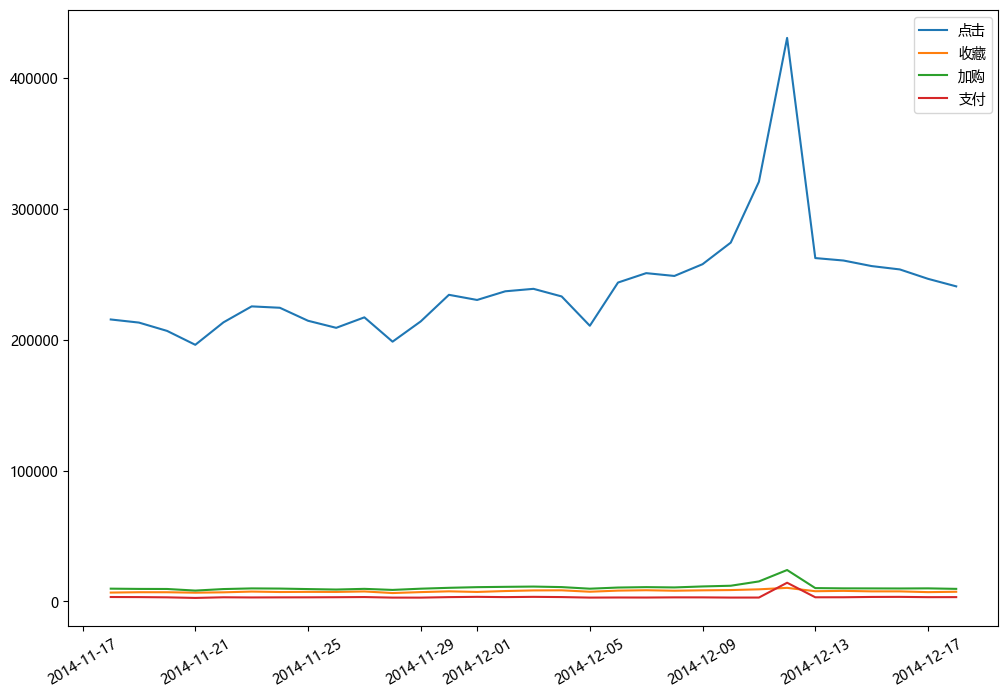

In [41]:
# 画出每天不同用户行为的pv折线图
plt.figure(figsize=(12, 8))
plt.xticks(rotation=30)
plt.plot(pv_df.index, pv_df[1], label='点击')
plt.plot(pv_df.index, pv_df[2], label='收藏')
plt.plot(pv_df.index, pv_df[3], label='加购')
plt.plot(pv_df.index, pv_df[4], label='支付')
plt.legend()
plt.show()

In [65]:
data.head()
s = data['behavior_type'].value_counts()
s.index = ['点击', '收藏', '加购', '支付']
df = pd.DataFrame([s.index, s]).T
df.columns = ['用户行为', '访问量']
df

,用户行为,访问量
0,点击,7479078
1,收藏,333371
2,加购,240919
3,支付,110672


In [66]:
t1 = df['访问量'][1:].values
t2 = df['访问量'][0:-1].values
p = list(t1 / t2 * 100)
p.insert(0, 100)
p

[100, 4.457380976639099, 72.26753376868413, 45.937431252827714]

In [67]:
df['单一环节转化率(%)'] = p
df

,用户行为,访问量,单一环节转化率(%)
0,点击,7479078,100.000000
1,收藏,333371,4.457381
2,加购,240919,72.267534
3,支付,110672,45.937431


In [68]:
df ['整体转化率（%）'] = df['访问量'] / df.iloc[0, 1] * 100
df

,用户行为,访问量,单一环节转化率(%),整体转化率（%）
0,点击,7479078,100.000000,100.0
1,收藏,333371,4.457381,4.457381
2,加购,240919,72.267534,3.221239
3,支付,110672,45.937431,1.479755


In [70]:
df['每一环节流失率(%)'] = 100 - df['单一环节转化率(%)']
df

,用户行为,访问量,单一环节转化率(%),整体转化率（%）,每一环节流失率(%)
0,点击,7479078,100.000000,100.0,0.000000
1,收藏,333371,4.457381,4.457381,95.542619
2,加购,240919,72.267534,3.221239,27.732466
3,支付,110672,45.937431,1.479755,54.062569


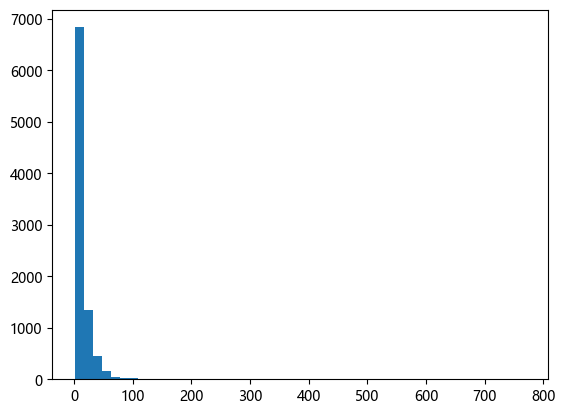

In [77]:
# 用户复购次数分布图
user_buy_s = data[data['behavior_type']==4].groupby('user_id')['behavior_type'].count()
plt.hist(user_buy_s, bins=50)
plt.show()

In [79]:
# 复购率
reBuy_rate = user_buy_s[user_buy_s>1].count() / user_buy_s.count()
reBuy_rate

0.9144722034661265

In [80]:
# 用户价值分析
buy_df = data[data['behavior_type']==4]
buy_df.head()

,user_id,item_id,behavior_type,item_category,date,hour
143,101260672,73008997,4,4076,2014-11-25,13
146,116730636,85319721,4,10079,2014-12-17,11
152,104811265,61764614,4,675,2014-12-01,13
177,106230218,238910858,4,12090,2014-12-03,11
198,100684618,271840783,4,12220,2014-11-23,18


In [81]:
buy_df['date'].max()

Timestamp('2014-12-18 00:00:00')

In [83]:
list(buy_df.groupby('user_id')['date'])[0]

('100001878',
 856793    2014-12-08
 857135    2014-12-10
 857361    2014-11-29
 1561813   2014-12-15
 1562759   2014-12-18
 1563422   2014-12-18
 2805007   2014-12-10
 2805196   2014-12-12
 2805456   2014-11-18
 2805646   2014-11-26
 3375701   2014-12-13
 3376063   2014-11-24
 3376520   2014-12-15
 4777428   2014-11-25
 5336955   2014-12-10
 5664933   2014-12-12
 5665034   2014-12-04
 5665161   2014-12-14
 5665303   2014-12-04
 5665330   2014-12-04
 5665420   2014-12-04
 5665574   2014-11-25
 6677670   2014-12-18
 6677710   2014-12-12
 6678009   2014-12-08
 6678165   2014-11-24
 6678201   2014-11-24
 7476239   2014-12-15
 7476404   2014-11-29
 7476485   2014-12-03
 7477010   2014-12-08
 8106481   2014-12-12
 8106570   2014-11-27
 8106695   2014-12-18
 8107208   2014-11-26
 8107266   2014-11-26
 Name: date, dtype: datetime64[ns])

In [84]:
now_date = buy_df['date'].max()
R = buy_df.groupby('user_id')['date'].apply(lambda x:now_date - x.max()) / np.timedelta64(1, 'D')
R.head()

user_id
100001878    0.0
100011562    2.0
100012968    0.0
100014060    0.0
100024529    2.0
Name: date, dtype: float64

In [85]:
F = buy_df.groupby('user_id')['date'].count()
F.head()

user_id
100001878    36
100011562     3
100012968    13
100014060    24
100024529    25
Name: date, dtype: int64

In [86]:
rfm = pd.DataFrame(data=[R, F], index=['R', 'F']).T
rfm.head()

,R,F
user_id,,
100001878,0.0,36.0
100011562,2.0,3.0
100012968,0.0,13.0
100014060,0.0,24.0
100024529,2.0,25.0


In [88]:
recent_avg = rfm['R'].mean()
freq_avg = rfm['F'].mean()

def rec_value(x):
    if x < recent_avg:
        return '1'
    return '0'

def freq_value(x):
    if x > freq_avg:
        return '1'
    return '0'

rfm['R_value'] = rfm['R'].apply(rec_value)
rfm['F_value'] = rfm['F'].apply(freq_value)
rfm['rfm'] = rfm['R_value'].str.cat(rfm['F_value'])
rfm.head()

,R,F,R_value,F_value,rfm
user_id,,,,,
100001878,0.0,36.0,1,1,11
100011562,2.0,3.0,1,0,10
100012968,0.0,13.0,1,1,11
100014060,0.0,24.0,1,1,11
100024529,2.0,25.0,1,1,11


In [90]:
def rfm_value(x):
    if x == '11':
        return '重要价值用户'
    elif x == '10':
        return '重要发展用户'
    elif x == '01':
        return '重要保持用户'
    else:
        return '重要挽留用户'

rfm['user_type'] = rfm['rfm'].apply(rfm_value)
rfm.head(10)

,R,F,R_value,F_value,rfm,user_type
user_id,,,,,,
100001878,0.0,36.0,1,1,11,重要价值用户
100011562,2.0,3.0,1,0,10,重要发展用户
100012968,0.0,13.0,1,1,11,重要价值用户
100014060,0.0,24.0,1,1,11,重要价值用户
100024529,2.0,25.0,1,1,11,重要价值用户
100027681,4.0,43.0,1,1,11,重要价值用户
100035725,0.0,4.0,1,0,10,重要发展用户
100039408,29.0,1.0,0,0,00,重要挽留用户
100042340,0.0,3.0,1,0,10,重要发展用户


In [95]:
user_type_count_s = rfm['user_type'].value_counts()
user_type_rate = user_type_count_s / user_type_count_s.sum() * 100
user_type_rate

user_type
重要挽留用户    34.233626
重要发展用户    33.400855
重要价值用户    27.143822
重要保持用户     5.221697
Name: count, dtype: float64

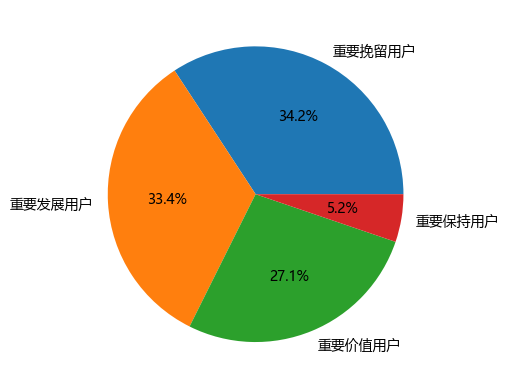

In [96]:
plt.pie(user_type_rate, labels=user_type_rate.index, autopct='%1.1f%%')
plt.show()